# **Lightning Strikes 6**

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2016&ndash;2018. The dataset includes three columns:  

|date|number_of_strikes|center_point_geom|
|---|---|---|  

The objective is to assign the monthly number of strikes to the following categories: mild, scattered, heavy, or severe. Then we will create a heatmap of the three years so we can get a high-level understanding of monthly lightning severity from a simple diagram.   

In [6]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/Users/timothypark/Documents/portfolios/timpark99.github.io/Lightning Strikes 6/eda_label_encoding_dataset v2.csv')

In [7]:
df.head()

,date,number_of_strikes,center_point_geom
0,8/5/16,16,POINT(-101.5 24.7)
1,8/5/16,16,POINT(-85 34.3)
2,8/5/16,16,POINT(-89 41.4)
3,8/5/16,16,POINT(-89.8 30.7)
4,8/5/16,16,POINT(-86.2 37.9)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   date               1048575 non-null  object
 1   number_of_strikes  1048575 non-null  int64 
 2   center_point_geom  1048575 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


### Create a categorical variable `strike_level`

Begin by converting the `date` column to datetime. Then we'll create a new `week` column that contains the week number

In [10]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create new `month` column
df['month'] = df['date'].dt.month_name().str.slice(stop=3)

df.head()

/var/folders/5z/f5jycvmd0x58dvn1by8xk79h0000gn/T/ipykernel_12538/3456809737.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,date,number_of_strikes,center_point_geom,month
0,2016-08-05,16,POINT(-101.5 24.7),Aug
1,2016-08-05,16,POINT(-85 34.3),Aug
2,2016-08-05,16,POINT(-89 41.4),Aug
3,2016-08-05,16,POINT(-89.8 30.7),Aug
4,2016-08-05,16,POINT(-86.2 37.9),Aug


Next, we'll encode the months as categorical information. This allows us to specifically designate them as categories that adhere to a specific order, which is helpful when we plot them later. We'll also create a new `year` column. Then we'll group the data by year and month, sum the remaining columns, and assign the results to a new dataframe.

In [12]:
# Create categorical designations
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Encode `month` column as categoricals 
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Create `year` column by extracting the year info from the datetime object
df['year'] = df['date'].dt.strftime('%Y')

# Create a new df of month, year, total strikes
df_by_month = df.groupby(['year', 'month']).sum(numeric_only=True).reset_index()
df_by_month.head()

# NOTE: In pandas v.2.X+ you must set 'numeric_only=True' or else the sum() function will throw an error

,year,month,number_of_strikes
0,2016,Jan,32573
1,2016,Feb,31652
2,2016,Mar,200948
3,2016,Apr,266221
4,2016,May,579406


Now we'll create a new column called `strike_level` that contains a categorical variable representing the lightning strikes for each month as mild, scattered, heavy, or severe. The `pd.qcut` pandas function makes this easy. We just input the column to be categorized, the number of quantiles to sort the data into, and how we want to name each quantile. For more information on this function, refer to the [pandas qcut() documentation](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [14]:
# Create a new column that categorizes number_of_strikes into 1 of 4 categories
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'],
    4,
    labels = ['Mild', 'Scattered', 'Heavy', 'Severe'])
df_by_month.head()

,year,month,number_of_strikes,strike_level
0,2016,Jan,32573,Mild
1,2016,Feb,31652,Mild
2,2016,Mar,200948,Scattered
3,2016,Apr,266221,Heavy
4,2016,May,579406,Severe


### Encode `strike_level` into numerical values
Now that we have a categorical `strike_level` column, we can extract a numerical code from it using `.cat.codes` and assign this number to a new column. 

In [16]:
# Create new column representing numerical value of strike level
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,32573,Mild,0
1,2016,Feb,31652,Mild,0
2,2016,Mar,200948,Scattered,1
3,2016,Apr,266221,Heavy,2
4,2016,May,579406,Severe,3


We can also create binary "dummy" variables from the `strike_level` column. This is a useful tool if we'd like to pass the categorical variable into a model. To do this, we could use the function `pd.get_dummies()`. Note that this is just to demonstrate the functionality of `pd.get_dummies()`. Simply calling the function as we do below will not convert the data unless we reassigned the result back to a dataframe. 

`pd.get_dummies(df['column'])` 🠚 **df unchanged**  
`df = pd.get_dummies(df['column'])` 🠚 **df changed**

In [18]:
pd.get_dummies(df_by_month['strike_level'])

,Mild,Scattered,Heavy,Severe
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,True
5,False,False,False,True
6,False,False,False,True
7,False,False,False,True
8,False,False,True,False
9,False,True,False,False


We don't need to create dummy variables for our heatmap, so let's continue without converting the dataframe.

### Create a heatmap of number of strikes per month
We want our heatmap to have the months on the x-axis and the years on the y-axis, and the color gradient should represent the severity (mild, scattered, heavy, severe) of lightning for each month. A simple way of preparing the data for the heatmap is to pivot it so the rows are years, columns are months, and the values are the numeric code of the lightning severity. 

We can do this with the `df.pivot()` method. It accepts arguments for `index`, `columns`, and `values`, which we'll specify as described. For more information on the `df.pivot()` method, refer to the [pandas pivot() method documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

In [29]:
# Create new df that pivots the data
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,0,0,1,2,3,3,3,3,2,1,0,0
2017,1,0,1,2,2,2,3,3,2,1,0,0
2018,1,2,1,1,2,3,3,3,2,1,0,0


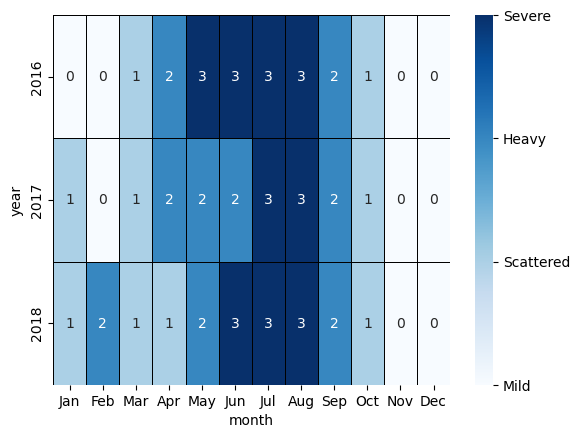

<Figure size 1000x700 with 0 Axes>

In [46]:
# linewidth shows us borders between each grid coordinate
# annot gives us the number in each grid coordinate
ax = sns.heatmap(df_by_month_plot, cmap = 'Blues', linewidths=0.5, linecolor='black', annot=True, fmt='d')
plt.figure(figsize=(10,7))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()

The heatmap indicates that for all three years, the most lightning strikes occurred during the summer months. A heatmap is an easily digestable way to understand a lot of data in a single graphic.  